In [1]:
import matplotlib.pyplot as plt
import numpy as np
d=np.loadtxt('ex1data1.txt',delimiter=',')
x=d[:,0] #population
y=d[:,1]   #profit
print(len(y))

97


# linear regression with single feature

In [2]:
max_iterations=1500
alpha=0.01
precision=0.0001
m=len(y)    
iteration=1
theta0=0
theta1=0
while iteration<=max_iterations:
    cost_fn=np.sum((theta0+theta1*x-y)**2)/(2*m)
    temp0=theta0-(alpha*np.sum(theta0+theta1*x-y))/m
    temp1=theta1-(alpha*np.sum((theta0+theta1*x-y)*x))/m
    theta0=temp0
    theta1=temp1
    cost_fn1=np.sum((theta0+theta1*x-y)**2)/(2*m)
    
    iteration=iteration+1
    if abs((cost_fn1-cost_fn))<=precision:   #Automatic Convergence Test....declare convergence if cost fn. changes by
                                              #0.0001 in one iteration.
        break
    else:
        continue

theta0=-3.3454713314071474
theta1=1.1377490810952493
Profit at 3.5k population is 0.6366504524262253
Profit at 7k population is 4.618772236259598


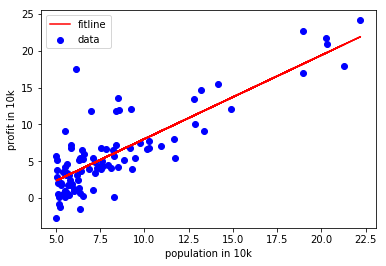

In [15]:
print(f'theta0={theta0}')
print(f'theta1={theta1}')
h=theta0+theta1*x
print(f"Profit at 3.5k population is {theta0+theta1*3.5}")
print(f"Profit at 7k population is {theta0+theta1*7}")

plt.scatter(x,y,color='b',label='data')
plt.plot(x,h,color='r',label='fitline')
plt.xlabel('population in 10k')
plt.ylabel('profit in 10k')
plt.legend()
plt.show()



# Linear Regression using sklearn

theta1 is [1.19303364]
theta0 is -3.89578087831185
profit at 3.5k population is 0.2798368763517267
Profit at 7k population is 4.455454631015304


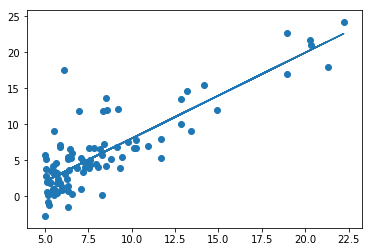

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)
hypothesis=model.predict(x[:,np.newaxis])
plt.plot(x,hypothesis)
plt.scatter(x,y)
print(f'theta1 is {model.coef_}')   #theta1
print(f'theta0 is {model.intercept_}')   #theta0
print(f'profit at 3.5k population is {model.predict(3.5)[0]}')
print(f"Profit at 7k population is {model.predict(7)[0]}")

# linear regression with multiple features 

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

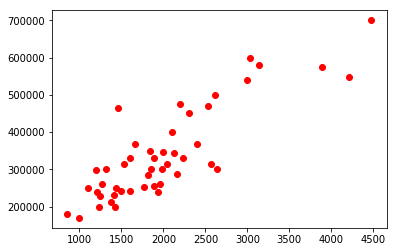

In [5]:
data2=np.loadtxt('ex1data2.txt',delimiter=',')
print(data2)
#data visualisation
plt.scatter(data2[:,0],data2[:,2],color='r')
print(np.mean(data2[:,0]))

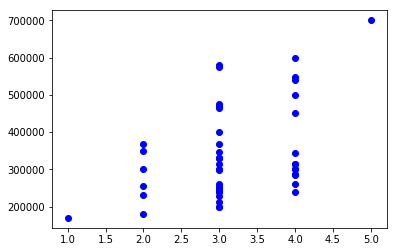

In [6]:
plt.scatter(data2[:,1],data2[:,2],color='b')

In [7]:
#since no. of bedrooms are in range of 1-5 while house of sizes go upto 4500.so we have to do feature normalisation
#feature normalisation
X=data2[:,0:2]
Y=data2[:,2]
m=len(X)
X=(X-np.mean(X))/np.std(X)
X.shape


(47, 2)

In [8]:
ones=np.ones((m,1))
X=np.hstack((ones,X))
alpha=0.01
num_iterations=500
theta=np.zeros((3,1))
Y=Y[:,np.newaxis]
X.shape

(47, 3)

# gradient descent

In [9]:
def compute_cost(X,Y,theta):
    tmp=np.dot(X,theta)-Y
    return np.sum(tmp**2)/(2*m)
j=compute_cost(X,Y,theta)
print(j)

65591548106.45744


[[ 119152.8311082 ]
 [ 149952.32674736]
 [-104101.27598271]]


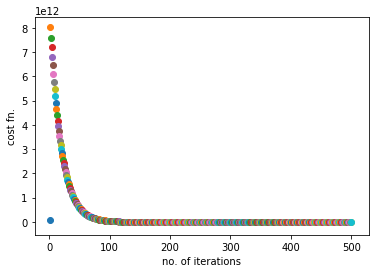

In [10]:
def grad_desc(X,Y,theta,alpha,iterations):
    tmp=np.dot(X,theta)-Y
    for p in range(iterations):

        cost_init=np.sum(tmp**2)/(2*m)
        
        tmp=np.dot(X,theta)-Y
        tmp=np.dot(X.T,tmp)      #this term is differentiation of j w.r.t theta.
        theta=theta-(alpha/m)*tmp
        cost_fin=np.sum(tmp**2)/(2*m)
       
        plt.scatter(p+1,cost_init)
        plt.xlabel("no. of iterations")
        plt.ylabel("cost fn.")
        if abs(cost_init-cost_fin)<0.0001:  #absolute convergence test
            break
        else:
            continue
    return theta
theta=grad_desc(X,Y,theta,alpha,num_iterations)
print(theta)

In [14]:
j=compute_cost(X,Y,theta)
print(f"cost fn after 400 iterations {j}")
def pred_price(size,bedroom):
    testdata=np.array([1,size,bedroom])
    normal_testdata=(testdata-np.mean(X))/(np.std(X))
    return np.dot(normal_testdata,theta)
pred_price=pred_price(1650,3)
pred_price


cost fn after 400 iterations 2061633810.9103115


array([2.62166755e+08])

# normal equation

In [13]:
inv=np.linalg.inv(np.dot(X.T,X))
q=np.dot(inv,X.T)
theta_norm=np.dot(q,Y)

cost_norm=compute_cost(X,Y,theta_norm)
print(cost_norm)

2043280050.6028278
